CANNY

* Detects edges based on gradient.
* Set 2 thresholds low and high.
* Reject all pixels below low threshold .
* Now we look at pixels having a huge gradient difference with its surrounding cells, if so, it is possibly an edge.


In [1]:
from matplotlib import pyplot as plt
from matplotlib import image as img
import numpy as np
import cv2

In [2]:
image = img.imread('exitRamp.jpg')

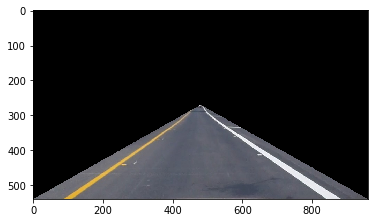

In [23]:
ysize = image.shape[0]
xsize = image.shape[1]

left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, ysize/2]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)



XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_thresholds = (YY > (XX*fit_left[0]+fit_left[1]))& \
                    (YY > (XX*fit_right[0]+fit_right[1]))& \
                    (YY < (XX*fit_bottom[0]+fit_bottom[1]))

image[~region_thresholds]=[0,0,0]

plt.imshow(image)
plt.show()

In [24]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [25]:
#increasing kernel size applies the Gaussian filter over a larger area
#Gaussian filter is applied to smoothen out the picture and remove noise

In [26]:
kernel_size = 3
blur_gray_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)

In [27]:
#low:high should be 1:3
low_threshold = 150
high_threshold = 250
edges = cv2.Canny(blur_gray_image, low_threshold, high_threshold)

In [1]:
#plt.imshow(blur_gray_image, cmap='Greys_r')
plt.imshow(edges, cmap='Greys_r')
plt.show()

NameError: name 'plt' is not defined

HOUGH TRANSFORM

Converting an image from Image Space(x, y) to Hough Space(m, b). A line in image space is represented as a dot in Hough Space.


In [54]:
#Hough Transform parameters

#Image Space to Rho Theta Space
#All angles are in radians and all distanes are in pixels
rho = 1 #distance
theta = np.pi/180 #angular resolution
threshold = 1 # no. of intersections in a given grid cell => parallel lines in Image space
min_line_length = 10 #minimum length of the line in pixels
max_line_gap = 3 #maximum distance between segments that can be joined to form a line
line_image = np.copy(image)*0 #creating one more screen like RGB to draw liness on

In [55]:
masked_edges = edges 
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, min_line_length, max_line_gap)

In [56]:
#drawing lines over detected edges
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0), 10)

In [57]:
#creating a colour binary image with line image
colour_edges = np.dstack((masked_edges, masked_edges, masked_edges))

both_edges = cv2.addWeighted(colour_edges, 0.8, line_image, 1, 0)

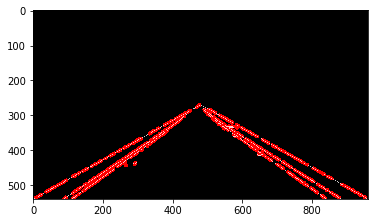

In [59]:
plt.imshow(both_edges)
plt.show()